In [7]:
import os
import numpy as np
import matplotlib
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

In [8]:
rootdir = '/home/anverdie/Documents/Code/hl'


In [9]:
calib_dict = {'10': 0.04,
              '20': 0.2,
              '30': 0.5,
              '40': 0.9,
              '50': 1.4,
              '60': 2.1,
              '70': 2.75,
              '75': 3.1,
              '80': 3.5,
              '85': 3.8,
              '90': 4.0,
              '95': 4.3,
              '100':4.5}
size_px = 0.196 # in mm2

[0.20408163265306123, 1.0204081632653061, 2.5510204081632653, 4.591836734693877, 7.142857142857142, 10.714285714285714, 14.03061224489796, 15.816326530612244, 17.857142857142858, 19.387755102040813, 20.408163265306122, 21.93877551020408, 22.959183673469386]


Text(0, 0.5, 'Light intensity - mW/mm2 ')

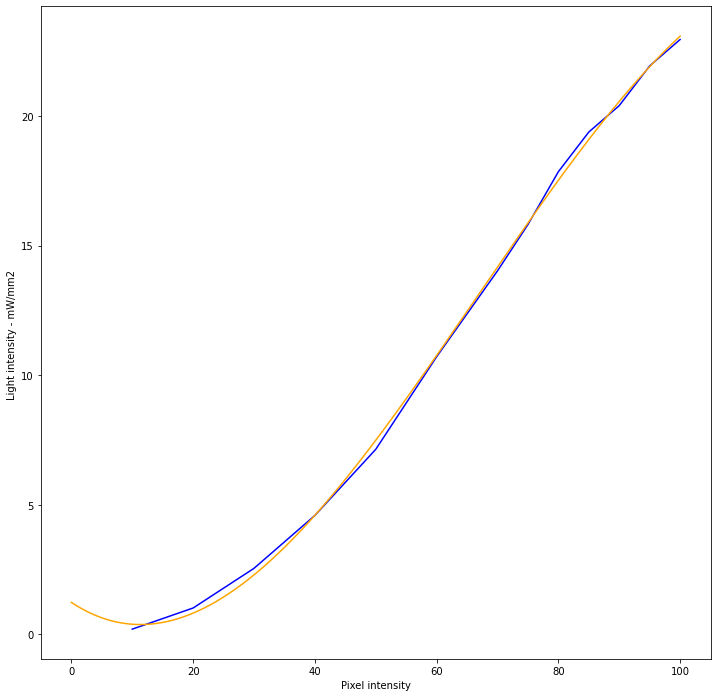

In [10]:
# Find a polynomial fit for the power function
plt.figure(figsize=(12, 12))

data_pts = [int(k) for k in calib_dict]
powers = [v/0.196 for v in calib_dict.values()]

print(powers)

poly = Polynomial.fit(data_pts, powers, 3)
x = np.linspace(0, 100, 1000)
y = poly(x)

plt.plot(data_pts, powers, color='b')
plt.plot(x, y, color='orange')

plt.xlabel('Pixel intensity')
plt.ylabel('Light intensity - mW/mm2 ')

In [11]:
# Find closest value of image and convert it
# Set the minimum for optogenetic activation (may need to be determined from neurometrics)
min_acti = 5

paths = [os.path.join(rootdir, p) for p in os.listdir(rootdir)]
print(paths)
if not os.path.exists(os.path.join(rootdir, 'Normalized')):
    os.makedirs(os.path.join(rootdir, 'Normalized'))

for path in paths:
    img = np.load(path) # Convert from bmp
    img = (img / np.max(img))
    active_units = img[img != 0] # Only compute active units
    active_units = min_acti + active_units * (np.max(powers) - min_acti) # Normalize
    idx_powers = [np.argmin(np.abs(y - a)) for a in active_units]
    img[img != 0] = x[idx_powers] * 2.55
    np.save(os.path.join(rootdir, 'Normalized', os.path.basename(path)), img)

['/home/anverdie/Documents/Code/hl/2.npy', '/home/anverdie/Documents/Code/hl/12.npy', '/home/anverdie/Documents/Code/hl/13.npy', '/home/anverdie/Documents/Code/hl/17.npy', '/home/anverdie/Documents/Code/hl/14.npy', '/home/anverdie/Documents/Code/hl/4.npy', '/home/anverdie/Documents/Code/hl/18.npy', '/home/anverdie/Documents/Code/hl/3.npy', '/home/anverdie/Documents/Code/hl/1.npy', '/home/anverdie/Documents/Code/hl/8.npy', '/home/anverdie/Documents/Code/hl/10.npy', '/home/anverdie/Documents/Code/hl/0.npy', '/home/anverdie/Documents/Code/hl/6.npy', '/home/anverdie/Documents/Code/hl/5.npy', '/home/anverdie/Documents/Code/hl/15.npy', '/home/anverdie/Documents/Code/hl/19.npy', '/home/anverdie/Documents/Code/hl/16.npy', '/home/anverdie/Documents/Code/hl/9.npy', '/home/anverdie/Documents/Code/hl/7.npy', '/home/anverdie/Documents/Code/hl/11.npy']


In [33]:
print(np.load('/home/anverdie/Documents/test/Normalized/PT_16000Hz_500ms_70dB.npy'))

[ -0.   -0.   -0.   -0.  149.6  -0.   -0.   -0.   -0.   -0.   -0.   -0.
 187.1  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.   -0.  168.8  -0.   -0.   -0.  253.8  -0.  159.2
  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.  156.8  -0.
  -0.   -0.  153.4  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  -0.  170.2  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 153.1  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.  187.9  -0.   -0.
  -0.   -0.   -0.   -0. ]


In [12]:
if not os.path.exists(os.path.join(rootdir, 'Imaged')):
	os.makedirs(os.path.join(rootdir, 'Imaged'))

for f in os.listdir(os.path.join(rootdir, 'Normalized')):
		l = np.load(os.path.join(rootdir,'Normalized', f)).reshape(10, 10)/255
		l = np.repeat(l, 72, axis=0)
		l = np.repeat(l, 72, axis=1)
		pad = np.zeros((280, 720))
		l = np.concatenate((pad, l, pad)).T

		np.save(os.path.join(rootdir, 'Imaged', '{}_dlp.npy'.format(f[:-4])), l)

		matplotlib.image.imsave(os.path.join(rootdir, 'Imaged', '{}_dlp.bmp'.format(f[:-4])), 1-l, cmap='Greys', vmin=0, vmax=1)

In [21]:
print([i for i in np.load('/home/anverdie/Documents/test/Normalized/PT_16000Hz_500ms_70dB.npy')])

[-0.0, -0.0, -0.0, -0.0, 147.2, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 147.5, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 147.2, -0.0, -0.0, -0.0, 148.0, -0.0, 147.2, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 147.2, -0.0, -0.0, -0.0, 147.2, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 147.2, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 147.2, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 147.5, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


In [14]:
import natsort as n
root = '/home/anverdie/Documents/psycho_avg/Imaged'
names = [f[:-4] for f in n.natsorted(os.listdir('/home/anverdie/Documents/psycho_avg/Imaged'))]
print(names)

stims = [np.load(os.path.join(root, f)) for f in n.natsorted(os.listdir('/home/anverdie/Documents/psycho_avg/Imaged'))]

gp = stims[0]
avg = np.mean(go[go != 0])
print(avg)

for i, s in enumerate(stims):
    s[s != 0] = avg
    matplotlib.image.imsave(os.path.join(rootdir, 'Imaged', '{}_dlp_avg.png'.format(names[i])), 1-s, cmap='Greys', vmin=0, vmax=1)



['PT_6000Hz_500ms_70dB_dlp', 'PT_6000Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_6000Hz_500ms_70dB_dlp_dlp_avg', 'PT_6405Hz_500ms_70dB_dlp', 'PT_6405Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_6405Hz_500ms_70dB_dlp_dlp_avg', 'PT_6838Hz_500ms_70dB_dlp', 'PT_6838Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_6838Hz_500ms_70dB_dlp_dlp_avg', 'PT_7300Hz_500ms_70dB_dlp', 'PT_7300Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_7300Hz_500ms_70dB_dlp_dlp_avg', 'PT_7793Hz_500ms_70dB_dlp', 'PT_7793Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_7793Hz_500ms_70dB_dlp_dlp_avg', 'PT_8320Hz_500ms_70dB_dlp', 'PT_8320Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_8320Hz_500ms_70dB_dlp_dlp_avg', 'PT_8882Hz_500ms_70dB_dlp', 'PT_8882Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_8882Hz_500ms_70dB_dlp_dlp_avg', 'PT_9482Hz_500ms_70dB_dlp', 'PT_9482Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_9482Hz_500ms_70dB_dlp_dlp_avg', 'PT_10123Hz_500ms_70dB_dlp', 'PT_10123Hz_500ms_70dB_dlp_dlp_avg.bm', 'PT_10123Hz_500ms_70dB_dlp_dlp_avg', 'PT_10807Hz_500ms_70dB_dlp', 'PT_10807Hz_500ms_70dB_dlp_dlp_avg.bm', 

ValueError: Cannot load file containing pickled data when allow_pickle=False

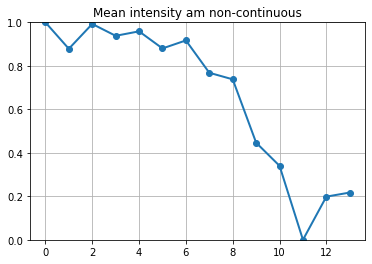

In [66]:
import natsort as n
rootdir = '/home/anverdie/Aymard Batch/stims_AM'

stims = [np.load(os.path.join(rootdir, f)) for f in n.natsorted(os.listdir(rootdir))]

means = [np.mean(s) for s in stims]
#print(np.max(means), np.min(means))
d = [0]+[np.abs(d - means[0]) for d in means[1:]]
d = 1 - (d - np.min(d))/(np.max(d)-np.min(d))
plt.plot(d, 'o-', linewidth=2)
plt.ylim((0,1))
plt.grid()
plt.title('Mean intensity am non-continuous')
#plt.savefig('mean_intensity_am_noncontinuous.svg')


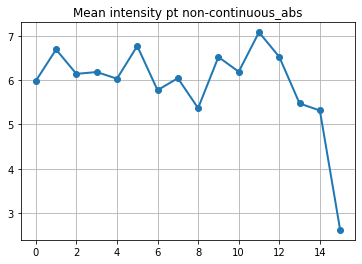

In [69]:
import natsort as n
rootdir = '/home/anverdie/Aymard Batch/stims'

stims = [np.load(os.path.join(rootdir, f)) for f in n.natsorted(os.listdir(rootdir))]

means = [np.mean(s) for s in stims]
plt.plot(means, 'o-', linewidth=2)
plt.grid()
plt.title('Mean intensity pt non-continuous_abs')
plt.savefig('mean_intensity_pt_noncontinuous_abs.svg')
